<a href="https://colab.research.google.com/github/Rajashekar-Anumalla/RossmannRetailSales_RegressionAnalysis/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Mounting the drive

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries as required

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [164]:
## Reading the datasets from drive
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Capstone_project_Two/RetailSales/Copy of Rossmann Stores Data.csv')
sales_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [165]:
## Looking at size of dataset
sales_data.shape

(1017209, 9)

In [166]:
## There are individual store details as well let's have a look over it
stores_details = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Capstone_project_Two/RetailSales/Copy of store.csv')
stores_details.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [167]:
## size of the store detail dataset
stores_details.shape

(1115, 10)

In [168]:
sales_data['Store'].value_counts()

1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

## Looking for missing values

In [169]:
## lets look into missing values in each dataset
print('Sales_data: \n\n', sales_data.isnull().sum())

print('\n\nStores_details: \n\n', stores_details.isnull().sum())

Sales_data: 

 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


Stores_details: 

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [170]:
''' From above in the stores dataset there are missing values in some features
we have decided to drop those features as most of the data is missing moreover 
we cannot able to predict this kind of data like date, month , year.'''

stores_details = stores_details.drop(['CompetitionOpenSinceMonth',
                                     'CompetitionOpenSinceYear','Promo2SinceWeek',
                                     'Promo2SinceYear','PromoInterval'],axis = 1)

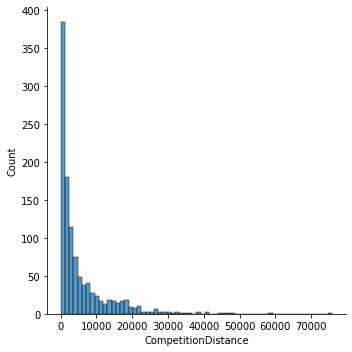

In [171]:
## Here we will replace the missing values in CompetitionDistance features
## Before that we will have a look at distribution in order to decided with what 
##value can we able to impute missing values so has to have good results

sns.displot(stores_details.CompetitionDistance)


In [172]:
## we can see that the distribution is right skewed so we can impute missing 
##values with median of the all available values

stores_details.CompetitionDistance.fillna(stores_details.CompetitionDistance.median(), 
                                          inplace=True)

In [173]:
## now we again have look over missing values in store dataset

stores_details.isnull().sum()


Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

##Extraction of DATE feature 

In [174]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [175]:
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Day'] = sales_data['Date'].dt.day

## Joining two datasets

In [176]:
## Merging two dataset on store feature
data = pd.merge(sales_data, stores_details, how='left', on='Store')

In [177]:
## Looking at mwerged data
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,a,a,29910.0,0


In [178]:
## as we already extracted data from date feature we have decided to drop this feature
data = data.drop(['Date'],axis=1)

In [179]:
data.tail(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2
1017204,1111,2,0,0,0,0,a,1,2013,1,1,a,a,1900.0,1
1017205,1112,2,0,0,0,0,a,1,2013,1,1,c,c,1880.0,0
1017206,1113,2,0,0,0,0,a,1,2013,1,1,a,c,9260.0,0
1017207,1114,2,0,0,0,0,a,1,2013,1,1,a,c,870.0,0
1017208,1115,2,0,0,0,0,a,1,2013,1,1,d,c,5350.0,1


In [180]:
data.shape

(1017209, 15)

## Dropping of some more features which are not so useful 

In [181]:
## here we don't need stores which were closed
data = data[data['Open'] == 1]
## now we can drop this feature, howevere all stores are open now

data.drop(['Open'],axis = 1,inplace=True)

In [182]:
data.shape

(844392, 14)

In [183]:
## lets check whether are there any sales value is 0

sales_zero = data[data['Sales']==0]['Store'].sum()
sales_total = data['Sales'].sum()
print(sales_zero)
print(sales_total)

per_sal_zero = sales_zero/sales_total
print(f'Precentage of sales zero is : {per_sal_zero}')

31460
5873180623
Precentage of sales zero is : 5.3565524405633455e-06


In [184]:
## we came to know that sales whose values are zero are very low 
## therefore we may drop them 

data = data[data['Sales']!=0]

In [185]:
# Now lets see what is size of our dataset

print(data.shape)
# lets make a copy of datasets

data1 = data.copy()
data1.head(5)

(844338, 14)


,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,5263,555,1,0,1,2015,7,31,c,a,1270.0,0
1,2,5,6064,625,1,0,1,2015,7,31,a,a,570.0,1
2,3,5,8314,821,1,0,1,2015,7,31,a,a,14130.0,1
3,4,5,13995,1498,1,0,1,2015,7,31,c,c,620.0,0
4,5,5,4822,559,1,0,1,2015,7,31,a,a,29910.0,0


## Feature Engineering

In [186]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844338 non-null  int64  
 1   DayOfWeek            844338 non-null  int64  
 2   Sales                844338 non-null  int64  
 3   Customers            844338 non-null  int64  
 4   Promo                844338 non-null  int64  
 5   StateHoliday         844338 non-null  object 
 6   SchoolHoliday        844338 non-null  int64  
 7   Year                 844338 non-null  int64  
 8   Month                844338 non-null  int64  
 9   Day                  844338 non-null  int64  
 10  StoreType            844338 non-null  object 
 11  Assortment           844338 non-null  object 
 12  CompetitionDistance  844338 non-null  float64
 13  Promo2               844338 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 96.6+ MB


In [187]:
## lets look at whats in features having dtype as object

print(f'Unique values in State Holiday feature: \n {data1.StateHoliday.unique()}')
print(f'\n\n Uniques values in Store Type features: \n {data1.StoreType.unique()}')
print(f'\n\n Uniques values in Assorment features: \n {data1.Assortment.unique()}')

Unique values in State Holiday feature: 
 ['0' 'a' 'b' 'c' 0]


 Uniques values in Store Type features: 
 ['c' 'a' 'd' 'b']


 Uniques values in Assorment features: 
 ['a' 'c' 'b']


In [188]:
## we observed here that StateHoliday contains categorical and numerical values 
## so here we will converts that 0 into categorical value

data1.loc[data1.StateHoliday == 0,'StateHoliday'] = data1.loc[data1.StateHoliday == 0,
                                                           'StateHoliday'].astype(str)

data1.shape

(844338, 14)

## Creating  new Variables 

In [189]:
## here we write code to get the data of average sales per month

sales_mon = data1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales_mon = sales_data.rename(columns={'Sales':'AvgSales'})
sales_mon.reset_index()

,index,Store,DayOfWeek,Date,AvgSales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017205,1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017206,1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1017207,1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1


In [190]:
data1['sales_key']=data1['Year'].map(str) + data1['Month'].map(str) + data1['Store'].map(str)
sales_mon['sales_key']=sales_mon['Year'].map(str) + sales_mon['Month'].map(str) + sales_mon['Store'].map(str)


In [191]:
# drop extra columns
sales_mon_new = sales_mon.drop(['Year','Month','Store'], axis=1)

# columns that are useful in order to avert duplicate columns after merging
cols_to_use = sales_mon.columns.difference(data1.columns)
# cols_to_use

# merge
data1 = pd.merge(data1, sales_mon_new[cols_to_use], left_index=True, right_index=True, how='outer')


In [192]:
data1.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2,sales_key,AvgSales,Date,Open
0,1.0,5.0,5263.0,555.0,1.0,0,1.0,2015.0,7.0,31.0,c,a,1270.0,0.0,201571,5263,2015-07-31,1
1,2.0,5.0,6064.0,625.0,1.0,0,1.0,2015.0,7.0,31.0,a,a,570.0,1.0,201572,6064,2015-07-31,1
2,3.0,5.0,8314.0,821.0,1.0,0,1.0,2015.0,7.0,31.0,a,a,14130.0,1.0,201573,8314,2015-07-31,1
3,4.0,5.0,13995.0,1498.0,1.0,0,1.0,2015.0,7.0,31.0,c,c,620.0,0.0,201574,13995,2015-07-31,1
4,5.0,5.0,4822.0,559.0,1.0,0,1.0,2015.0,7.0,31.0,a,a,29910.0,0.0,201575,4822,2015-07-31,1


In [193]:
## Here we write a code to get monthly average customer at each store

cust = data1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = data1.rename(columns={'Customers':'AvgCustomer'})
cust.reset_index(drop=True, inplace=True)

# data1.columns

In [194]:
data1['cust_key']=data1['Year'].map(str) + data1['Month'].map(str) + data1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)


In [195]:
data1 = data1.drop('Customers', axis=1)  # drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

# columns that are useful in order to avert duplicate columns after merging
cols_to_use2 = cust.columns.difference(data1.columns)
# cols_to_use2

# merge
data1 = pd.merge(data1, cust[cols_to_use2], left_index=True, right_index=True, how='outer')

In [196]:
data1.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,StoreType,Assortment,CompetitionDistance,Promo2,sales_key,AvgSales,Date,Open,cust_key,AvgCustomer
0,1.0,5.0,5263.0,1.0,0,1.0,2015.0,7.0,31.0,c,a,1270.0,0.0,201571,5263,2015-07-31,1,2015.07.01.0,555.0
1,2.0,5.0,6064.0,1.0,0,1.0,2015.0,7.0,31.0,a,a,570.0,1.0,201572,6064,2015-07-31,1,2015.07.02.0,625.0
2,3.0,5.0,8314.0,1.0,0,1.0,2015.0,7.0,31.0,a,a,14130.0,1.0,201573,8314,2015-07-31,1,2015.07.03.0,821.0
3,4.0,5.0,13995.0,1.0,0,1.0,2015.0,7.0,31.0,c,c,620.0,0.0,201574,13995,2015-07-31,1,2015.07.04.0,1498.0
4,5.0,5.0,4822.0,1.0,0,1.0,2015.0,7.0,31.0,a,a,29910.0,0.0,201575,4822,2015-07-31,1,2015.07.05.0,559.0


In [197]:
## Encoding a feature
## 0 - not a state holiday; 1- is on a state holiday
data1['StateHoliday'] = data1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [198]:
# dropping extra columns
data1 = data1.drop(['cust_key','sales_key','Store','Date'], axis=1)

Upto now we have prepared dataframe , now we will try to draw some insights from the dataframe before building model

In [203]:
## lets look at the correlation between all features
corr = data1.corr()
corr

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,CompetitionDistance,Promo2,AvgSales,Open,AvgCustomer
DayOfWeek,1.000000,-0.178753,-0.289268,-0.001958,-0.139319,0.002099,-0.019710,0.008525,0.005540,-0.003252,-0.178753,NaN,-0.097266
Sales,-0.178753,1.000000,0.368199,0.019606,0.038635,0.036151,0.073589,-0.051865,-0.035908,-0.127556,1.000000,NaN,0.823552
Promo,-0.289268,0.368199,1.000000,0.002165,0.028971,0.023990,-0.006412,-0.126442,-0.002392,-0.000316,0.368199,NaN,0.182859
StateHoliday,-0.001958,0.019606,0.002165,1.000000,0.012593,0.002365,0.001242,-0.008083,0.010177,-0.010308,0.019606,NaN,0.049451
SchoolHoliday,-0.139319,0.038635,0.028971,0.012593,1.000000,-0.038686,0.118467,0.038085,-0.004256,-0.008244,0.038635,NaN,0.024915
Year,0.002099,0.036151,0.023990,0.002365,-0.038686,1.000000,-0.268835,0.008387,0.000632,-0.005696,0.036151,NaN,-0.000842
Month,-0.019710,0.073589,-0.006412,0.001242,0.118467,-0.268835,1.000000,-0.006577,0.003882,-0.025807,0.073589,NaN,0.053843
Day,0.008525,-0.051865,-0.126442,-0.008083,0.038085,0.008387,-0.006577,1.000000,-0.000227,0.001355,-0.051865,NaN,-0.035416
CompetitionDistance,0.005540,-0.035908,-0.002392,0.010177,-0.004256,0.000632,0.003882,-0.000227,1.000000,-0.141318,-0.035908,NaN,-0.147859
Promo2,-0.003252,-0.127556,-0.000316,-0.010308,-0.008244,-0.005696,-0.025807,0.001355,-0.141318,1.000000,-0.127556,NaN,-0.202207


Text(0.5, 1.0, 'Correlation Heatmap')

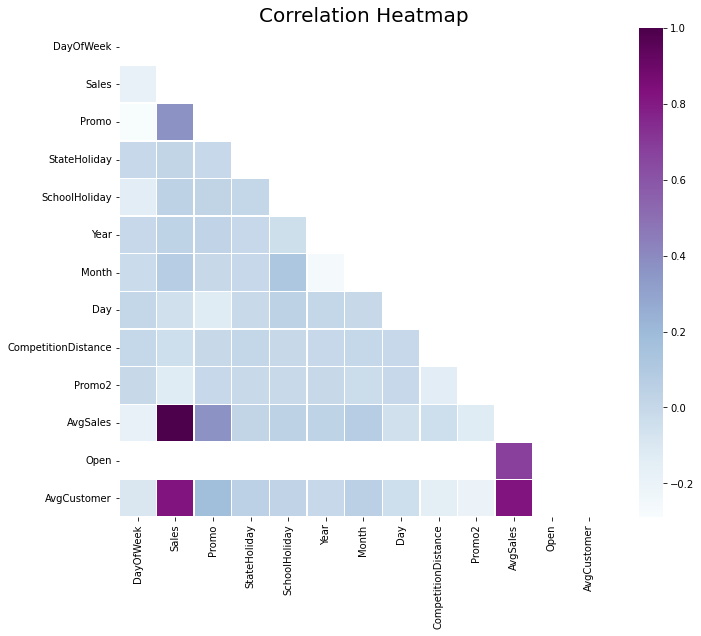

In [220]:
## here we will see graphical representation of correlation between features

# mask = np.zeros_like(corr, dtype = np.bool)
mask=np.triu(np.ones_like(corr))

# dataplot = sns.heatmap(corr, cmap='YlGnBu', annot = True, mask = mask)



# mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,square = True, linewidths = .5, ax = ax, cmap = "BuPu")
# sns.heatmap(data1)
plt.title("Correlation Heatmap", fontsize=20)